<h1><center>Greehouse Gas Emissions and Temperature from 1990-2014</center></h1>
<h3><center>Data Science Pipeline Tutorial<br><br>By Justin DeVito</center></h3>
<hr>

In [1]:
import pandas as pd
import requests as req
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Introduction
This notebook will walk through the process of using Python for analyzing data through the "data science pipeline".

The data science pipeline has the following steps:

1. Data collection/curation and parsing
2. Data management/representation
3. Exploratory data analysis
4. Hypothesis testing and machine learning
5. Communication of insights attained

First, let's begin with data collection.

## Getting Data
Data can be found anywhere online. If you're lucky there's an API that makes it easy to request data from a database, but sometimes it'll take a bit more elbow grease. If data is shown on a website you could read the HTML into Python, and parse through it to find the relevant data you want (libraries such as "Beautiful Soup" would help with this). The data you find does not initially need to be perfectly formatted for you to be able to perform data analysis on it.

In this notebook I am going to look at how greenhouse gas emissions have changed over time from 1990-2014, and global temperatures over that same span. I initially found greenhouse gas data for UN member nations (couldn't find a database with global emissions) on the United Nations' website, but each variable (carbon dioxide, methane, etc) was stored in a different dataset. I was able to find the same data on Kaggle, a website where you can find many datasets and other data science resources, which allowed me to download everyting I wanted directly as a CSV file.

UN website link:
http://data.un.org/Explorer.aspx

Kaggle link:
https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions

With that CSV file I can easily read it into Python using a library called Pandas, which helpes with storing the data and memory as a "dataframe" and provides many functions that help with manipulating the data.

In [2]:
# imports the csv into a pandas dataframe object
ghg_data = pd.read_csv("greenhouse_gas_inventory_data.csv")

# shows the first 5 rows
ghg_data.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


I found the global temperature data on NASA's website as a .txt file; it has the recorded "temperature anomaly" for each year from 1880 to 2020, where "temperature anomaly" is the temperature in Celsius *relative* to the average temperature from 1951-1980. It contains the exact values as well as "smoothed" values, but I will only deal with the exact data here. To import this data I'll use the requests library to get the data as a string, and then manipulate it using Python until I can put it into a dataframe.

Link to data:
https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt

Description of data:
https://climate.nasa.gov/vital-signs/global-temperature/

In [3]:
# gets the text file from nasa.gov
web = req.get("https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt")

# first 500 characters
web.text[:500]

# this is going to need a bit of cleaning up...

'Land-Ocean Temperature Index (C)\n--------------------------------\n\nYear No_Smoothing  Lowess(5)\n----------------------------\n1880     -0.17     -0.09\n1881     -0.08     -0.13\n1882     -0.10     -0.16\n1883     -0.17     -0.20\n1884     -0.28     -0.23\n1885     -0.33     -0.26\n1886     -0.31     -0.27\n1887     -0.36     -0.27\n1888     -0.17     -0.26\n1889     -0.10     -0.25\n1890     -0.35     -0.25\n1891     -0.22     -0.25\n1892     -0.27     -0.26\n1893     -0.31     -0.26\n1894     -0.30     -0.24\n'

In [4]:
# makes an array of each line as a string, and removes junk from the beginning and end
arr = web.text.split("\n")[5:-1]

arr[:5]

['1880     -0.17     -0.09',
 '1881     -0.08     -0.13',
 '1882     -0.10     -0.16',
 '1883     -0.17     -0.20',
 '1884     -0.28     -0.23']

In [5]:
# makes a dataframe from a 2d matrix of the year and temp columns
temp_data = pd.DataFrame(list(map(lambda s: s.split("     ")[:2], arr)))
temp_data.columns = ["year", "temp"]
temp_data.year = temp_data.year.transform(lambda y: int(y)) # makes consistent with ghg data
temp_data.temp = temp_data.temp.transform(lambda y: float(y))

temp_data.head()

,year,temp
0,1880,-0.17
1,1881,-0.08
2,1882,-0.10
3,1883,-0.17
4,1884,-0.28


## Data Management & Exploring the Data
Now that the data is scraped and loaded into memory, we can beginning exploring the data to get a better understanding of what we're working with. To do this, I'll first organize the dataframes, and then make some preliminary plots to see how the data changes with time.

In [6]:
# prints all categories in ghg_data, will rename to make dataframe easier to read
for s in ghg_data.category.drop_duplicates().values:
    print(s + "\n")

carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent

greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent

greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent

hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent

methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent

nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent

nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent

perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent

sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent

unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent



In [7]:
# pivots table to give each category a column, takes mean temp across all countries/areas
df = ghg_data.pivot_table(index="year", columns=["category"], aggfunc="mean")
df.columns = df.columns.droplevel()
df.columns = ["CO2", "GHGs", "GHGs_2", "HFCs", "CH4", "NF3", "N2O", "PFCs", "SF6", "HFCs_PFCs_mix"]

# GHGs_2 does not have indirect co2, so let's just drop in
df = df.drop("GHGs_2", axis=1)

# some data has HFCs and PFCs combined, so let's just combine them for the whole dataset
df["HFCs_PFCs_mix"] = df["HFCs_PFCs_mix"] + df["HFCs"] + df["PFCs"]
df = df.drop(["HFCs", "PFCs"], axis=1)

# adds a column for temp data
df = df.join(temp_data.set_index("year"), how="inner")

df.head()

,CO2,GHGs,CH4,NF3,N2O,SF6,HFCs_PFCs_mix,temp
year,,,,,,,,
1990,455379.936166,633243.305620,87094.095299,18.383797,36194.407289,2074.533801,14357.312190,0.45
1991,446193.986253,618145.225307,84511.860775,18.871227,34748.195912,2055.211806,13363.035486,0.41
1992,431901.700232,597397.641955,81528.146297,19.408413,33609.735740,2059.102498,12162.126651,0.22
1993,426304.676894,588482.640738,79167.104710,23.278081,32976.558788,2075.474610,11839.852256,0.23
1994,421997.498173,580717.203385,77076.932886,25.988809,32253.689517,2029.666582,11960.795374,0.32


To get a dataframe I could easily use to make plots, I first pivoted the greenhouse gas data so each category has its own column, and summed across all countries for each year; I also got rid of data for total greenhouse gas emissions without indirect CO2, I will only use the full total for my analysis in this tutorial. I also noticed some countries logged emissions for HFCs and PFCs seperately, but others didn't. To simplify analysis I just combined all of those emissions into one column called `HFCs_PFCs_mix`. Lastly, I added a column with the temperature data.

The column names represent the categories as follows:
 - `GHGs`: total greenhouse gas emissions
 - `CO2`: carbon dioxide
 - `CH4`: methane
 - `NF3`: nitrogen trifluoride
 - `N2O`: nitrous oxide
 - `SF6`: sulfur hexafluoride
 - `HFCs_PFCs_mix`: hydrofluorocarbons and perfluorocarbons (perfluorocarbons can also be simply called "fluorocarbons")
 - `temp`: NASA temperature data

Now, with the dataframe organized, we can make some preliminary plots.

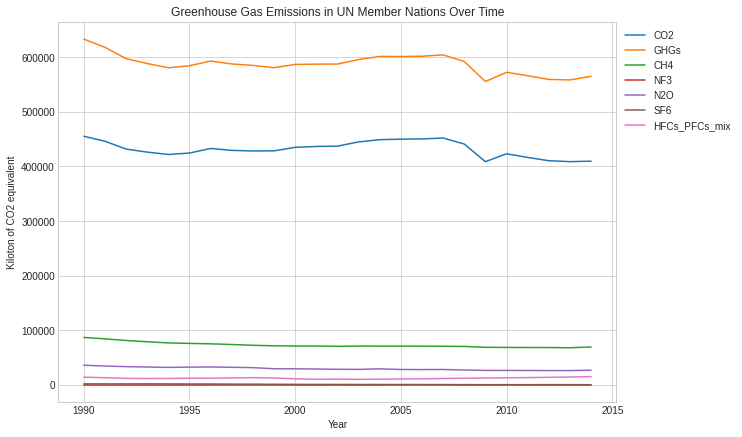

In [8]:
# plots all columns in df except temp
df.drop(["temp"], axis=1).plot(figsize=(10, 7))
plt.xlabel("Year")
plt.ylabel("Kiloton of CO2 equivalent")
plt.title("Greenhouse Gas Emissions in UN Member Nations Over Time")
plt.legend(bbox_to_anchor=(1,1), loc="upper left");

The plot above has a line for each column in the dataframe (except temp, it has different units). This plot shows that the total greenhouse gas emissions (GHGs) are really dominated by carbon dioxide (CO2); it has by far the highest emissions by mass out of all the greenhouse gasses shown here. It's hard to see if there is a trend in the other greenhouse gas emissions with time because the y-axis here is only really suited for the scale of CO2 emissions. To fix this, I'll make a seperate plot for each of the greenhouse gasses. 

I predict that when I make those plots, the total greenhouse gas plot and CO2 plot will look very similar, like they do here, because most of the total greenhouse gas emissions are CO2 emissions.

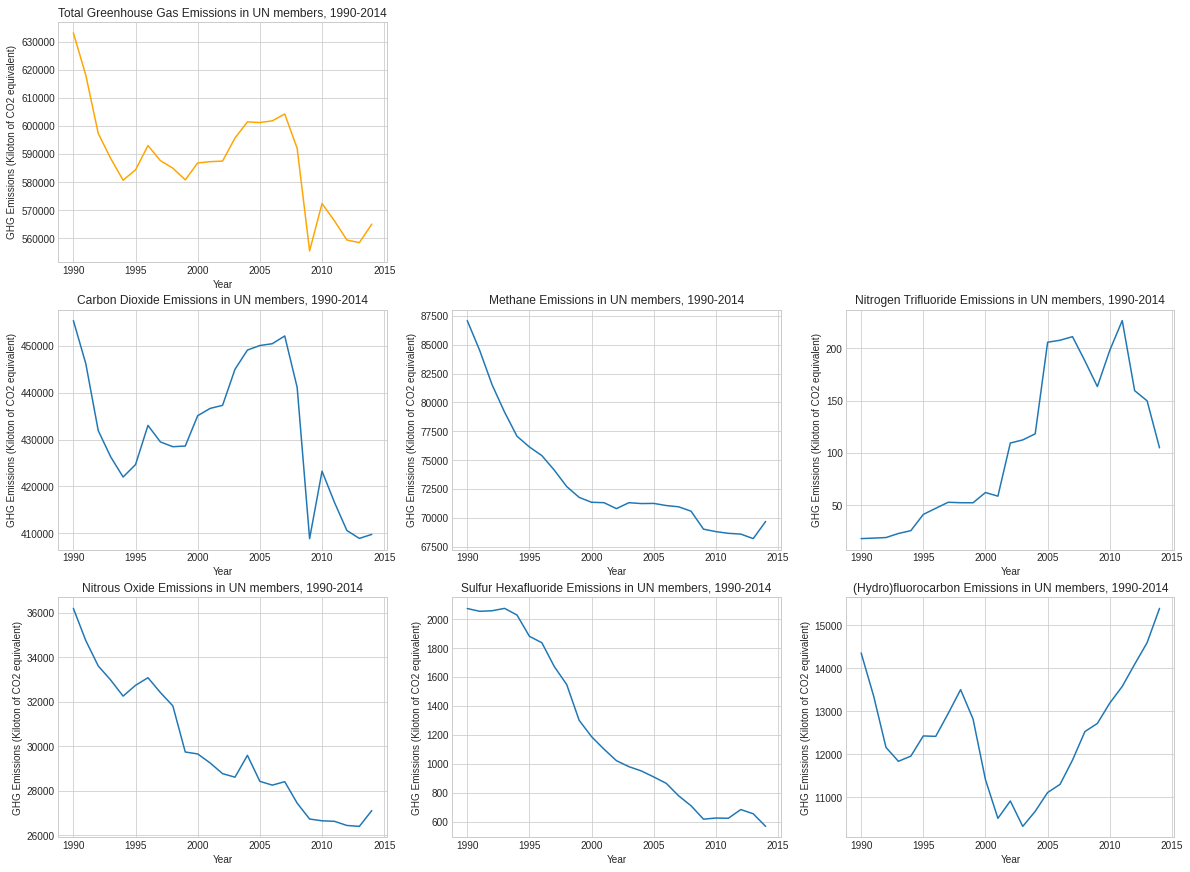

In [9]:
# plots all columns in df except temp, seperately this time
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.delaxes(ax[0][1])
fig.delaxes(ax[0][2])
df["GHGs"].plot(ax=ax[0][0], title="Total Greenhouse Gas Emissions in UN members, 1990-2014", color="orange")
df["CO2"].plot(ax=ax[1][0], title="Carbon Dioxide Emissions in UN members, 1990-2014")
df["CH4"].plot(ax=ax[1][1], title="Methane Emissions in UN members, 1990-2014")
df["NF3"].plot(ax=ax[1][2], title="Nitrogen Trifluoride Emissions in UN members, 1990-2014")
df["N2O"].plot(ax=ax[2][0], title="Nitrous Oxide Emissions in UN members, 1990-2014")
df["SF6"].plot(ax=ax[2][1], title="Sulfur Hexafluoride Emissions in UN members, 1990-2014")
df["HFCs_PFCs_mix"].plot(ax=ax[2][2], title="(Hydro)fluorocarbon Emissions in UN members, 1990-2014")

plt.setp(ax, xlabel="Year")
plt.setp(ax, ylabel="GHG Emissions (Kiloton of CO2 equivalent)");

I created 6 plots for each of the greenhouse gas categories plus one for the total greenhouse gas emissions. By looking at the y-axis we can see on what scales each of these types of emissions are. The largest, as I noted earlier, is carbon dioxide (CO2)—followed by methane (CH4), nitrous oxide (N2O), hydrofluorocarbons and (per)fluorocarbons (HFCs/PFCs), sulfur hexafluoride (SF6), and finally, nitrogen trifluoride (NF3).

We can also see from the plots a general trend in most of the categories. For example methane, nitrous oxide, and sulfur hexafluoride all appear to have clear downward trends with time, although I can't tell if the relationships are linear or not. My prediction of the greenhouse gas and carbon dioxide plots looking similar holds mostly true, although the right-hand side appears to be a little lower in the GHGs plot than the CO2 one. This, I believe, is due to the fact that many of the greenhouse gasses other than CO2 have downward trends with time, including the second largest contributer: methane.

Now I'll plot the temperature data to get see if there are any obvious trends there. My prediction here is that the temperature will be shown increasing with time, based on what I've heard about global warming.

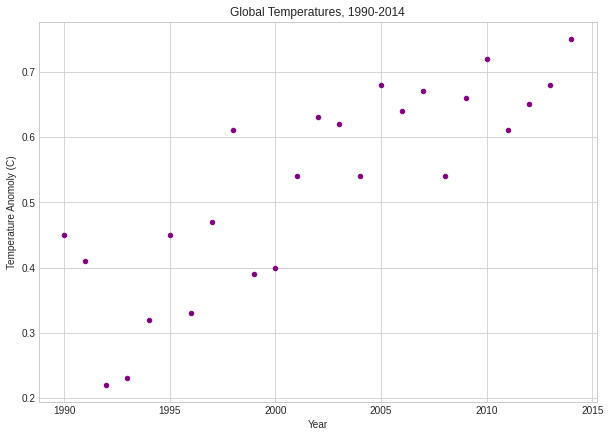

In [10]:
# plots temp data vs year
df.reset_index().plot(x="year", y="temp", kind="scatter", title="Global Temperatures, 1990-2014", \
                      color="purple", figsize=(10, 7))
plt.xlabel("Year")
plt.ylabel("Temperature Anomoly (C)");

This scatter plot has a point for each year from 1990-2014 representing the global temperature in that year. It looks to have a linear trend upwards with time—enough so that I will say we can reject the null hypothesis of no correlation between temperature and year. To make this trend even clearer, I'll add a linear regression line to the plot using a library called scikit-learn.

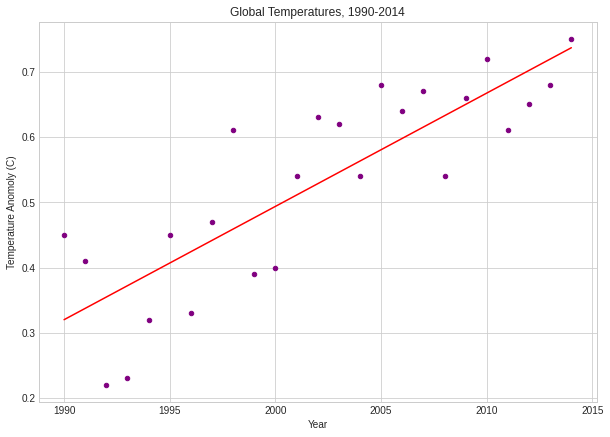

In [11]:
# plots temp data vs year
df.reset_index().plot(x="year", y="temp", kind="scatter", title="Global Temperatures, 1990-2014", \
                      color="purple", figsize=(10, 7))
plt.xlabel("Year")
plt.ylabel("Temperature Anomoly (C)")

# makes linear regression
X = df.index.values.reshape(-1, 1)
y = df.temp
reg = LinearRegression().fit(X, y)

# dataframe with model's predictions
reg_df = pd.DataFrame(reg.predict(X)).set_index(df.index.values)

# plots linear regression
plt.plot(reg_df, color="red");

In my opinion, this linear regression matches the data pretty well. It was made using a library called "scikit-learn" which here uses least squares to create a model from the x and y data.

## Hypothesis Testing & Machine Learning
After performing exploratory data analysis and getting a solid understanding of the data we're looking at, we can move into deeper analysis.

I want to see if there is a correlation between greenhouse gas emissions and global temperature, but I don't know what that relationship would be. Do greater emissions make greater temperatures for that year? It might make more sense for it to be a relationship with the derivative of temperature, however, because more greenhouse gasses in the atmosphere make greater temperatures on Earth, and emissions represent a change in the amount of greenhouse gasses in the atmosphere. It might even be a relationship with the second derivative of emissions for all I know, because of how the atmosphere changes surface temperatures.

To start I'll just try plotting temperature in vs. greenhouse gas emissions in each year.

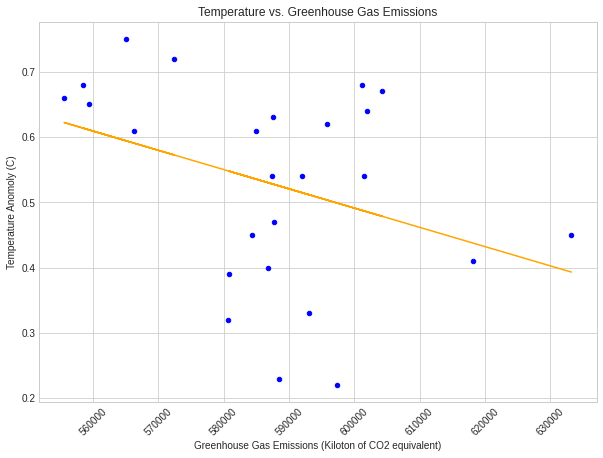

In [12]:
# plots data
ax = df.plot(x="GHGs", y="temp", kind="scatter", title="Temperature vs. Greenhouse Gas Emissions", \
             color="blue", figsize=(10, 7))
plt.xlabel("Greenhouse Gas Emissions (Kiloton of CO2 equivalent)")
plt.ylabel("Temperature Anomoly (C)")
plt.xticks(rotation = 45)

# plots linear regression
X = df.GHGs.values.reshape(-1, 1)
y = df.temp
reg = LinearRegression().fit(X, y)
reg_df = pd.DataFrame(reg.predict(X)).set_index(df.GHGs.values)
plt.plot(reg_df, color="orange");

This data does not appear to have any meaningful trend, but that's okay.

Now let's try the first derivative. I will get the "derivative" by using the `diff` function for a Pandas dataframe which replaces each entry with the difference between it and the entry "before it", which is by default the entry in the index before it.

In [13]:
# new dataframe with derivative of temp data
diff_df = df.copy()
diff_df["temp"] = diff_df["temp"].diff()

diff_df.head()

,CO2,GHGs,CH4,NF3,N2O,SF6,HFCs_PFCs_mix,temp
year,,,,,,,,
1990,455379.936166,633243.305620,87094.095299,18.383797,36194.407289,2074.533801,14357.312190,NaN
1991,446193.986253,618145.225307,84511.860775,18.871227,34748.195912,2055.211806,13363.035486,-0.04
1992,431901.700232,597397.641955,81528.146297,19.408413,33609.735740,2059.102498,12162.126651,-0.19
1993,426304.676894,588482.640738,79167.104710,23.278081,32976.558788,2075.474610,11839.852256,0.01
1994,421997.498173,580717.203385,77076.932886,25.988809,32253.689517,2029.666582,11960.795374,0.09


Because the first row (1990) doesn't have a row before it, the change in temperature is NaN, so let's just remove that row.

In [14]:
# drops the row with NaN
diff_df.drop(1990, inplace=True)

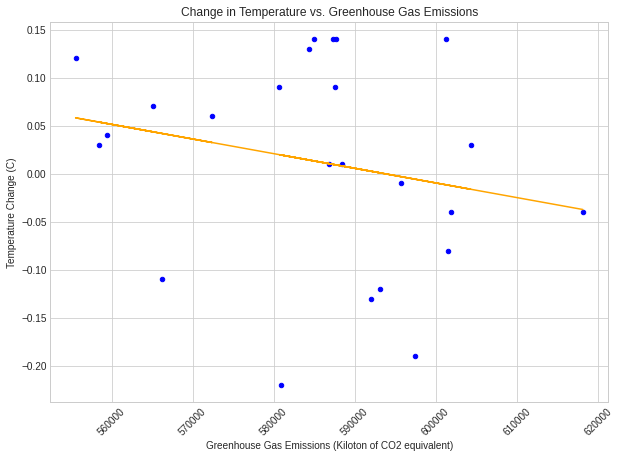

In [15]:
# plots data
diff_df.plot(x="GHGs", y="temp", kind="scatter", \
             title="Change in Temperature vs. Greenhouse Gas Emissions", color="blue", figsize=(10, 7))
plt.xlabel("Greenhouse Gas Emissions (Kiloton of CO2 equivalent)")
plt.ylabel("Temperature Change (C)")
plt.xticks(rotation = 45)

# plots linear regression
X = diff_df.GHGs.values.reshape(-1, 1)
y = diff_df.temp
reg = LinearRegression().fit(X, y)
reg_df = pd.DataFrame(reg.predict(X)).set_index(diff_df.GHGs.values)
plt.plot(reg_df, color="orange");

Again, there appears to be no meaningful trend in the data, let's now let's try with the second derivative of temperature.

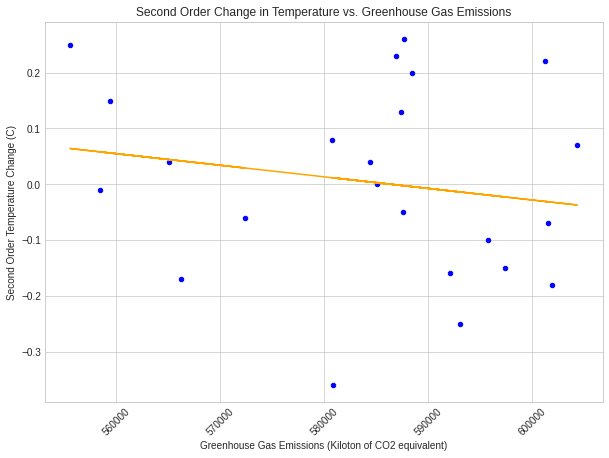

In [16]:
# dataframe with second derivative of temp
diff2_df = diff_df.copy()
diff2_df["temp"] = diff2_df["temp"].diff()
diff2_df.dropna(inplace=True)

# plots data
diff2_df.plot(x="GHGs", y="temp", kind="scatter", \
              title="Second Order Change in Temperature vs. Greenhouse Gas Emissions", \
              color="blue", figsize=(10, 7))
plt.xlabel("Greenhouse Gas Emissions (Kiloton of CO2 equivalent)")
plt.ylabel("Second Order Temperature Change (C)")
plt.xticks(rotation = 45)

# plots linear regression
X = diff2_df.GHGs.values.reshape(-1, 1)
y = diff2_df.temp
reg = LinearRegression().fit(X, y)
reg_df = pd.DataFrame(reg.predict(X)).set_index(diff2_df.GHGs.values)
plt.plot(reg_df, color="orange");

Okay, it seems like we are not going to find the relationship I was expecting. The best-fit lines make it seem like these 3 plots have downward trends, but if you look at the spread of the data points I don't think it is strong enough to reject the null hypothesis of no relationship. My prediction was based on what I know in general about greenhouse gas emissions leading to increased temperature in the long-term. The fact that this relationship cannot be replicated here means I assumed something wrong; either there is no relationship between greenhouse gas emissions and temperature, or more likely, something else. Perhaps this window of time (1990-2014) is too small of a sample size—or maybe the greenhouse gas emission data that I used, which only has data from UN member nations, is not as representative of global greenhouse gas emissions as I thought.

What I'm going to try to do now is throw all the data from each greenhouse gas category at a scikit-learn linear regression model with temperature as the target and see if I get any meaningful result. Hopefully the model will work, and by looking at at it I'll be able to get an understanding of why it works.

In [17]:
# creates the linear regression model
X = df.reset_index(drop=True).drop(["GHGs", "temp"], axis=1)
y = df["temp"]
reg = LinearRegression().fit(X, y)

To test how well it works, I'll calculate the residuals, which are the differences between each actual data point and what the model predicts it would be. So in this case, for each year, I'll subtract the actual temperature anomaly from the predicted temperature anomaly.

In [18]:
# creates dataframe with the model's predictions for 1990-2014
reg_df = pd.DataFrame(reg.predict(X))
reg_df.columns = ["model"]
model_df = reg_df.set_index(df.index).join(df["temp"])
model_df["residual"] = model_df["temp"] - model_df["model"]

model_df.head()

,model,temp,residual
year,,,
1990,0.437675,0.45,0.012325
1991,0.365398,0.41,0.044602
1992,0.300855,0.22,-0.080855
1993,0.271325,0.23,-0.041325
1994,0.267307,0.32,0.052693


Now I'll make a boxplot to get some info about the distribution of residuals.

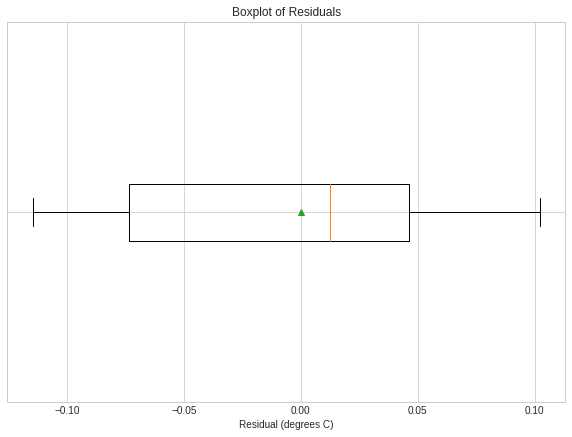

In [19]:
# makes the boxplot
plt.figure(figsize=(10, 7))
plt.boxplot(model_df["residual"], vert=False, showmeans=True)
plt.title("Boxplot of Residuals")
plt.xlabel("Residual (degrees C)")
plt.tick_params(left=False, labelleft=False)

This boxlpot shows that the model is a pretty good predictor of temperature, but it's not perfect. There are no outliers, and there are no residuals much greater than 0.1 degrees C. However, the median is a little bit off from zero.

In [20]:
# prints the coefficients of the model
coefs = pd.DataFrame(reg.coef_).set_index(X.columns)
coefs.columns = ["coefficient"]
coefs

,coefficient
CO2,-6.737207e-08
CH4,-7.161686e-06
NF3,4.014544e-04
N2O,5.707049e-05
SF6,-4.109046e-04
HFCs_PFCs_mix,1.708625e-05


These coefficients show the change in temperature in degrees celsius for each kiloton of CO2 equivalent of emissions of that greenhouse gas. It makes sense that they are all very small, because we are dealing with large values of greenhouse gasses (total emissions are on the scale of 10^5 kt CO2 equivalent), and temperature is only 
changing by a a fraction of a degree celsius.

However, I don't think the rest of this model makes much sense. It is saying that some greenhouse gasses, such as CO2 and CH4 have an inverse relationship with temperature, while others like NF2 and N2O have a direct relationship. This doesn't make sense to me, logically, because I have been led to believe all greenhouse gasses in the atmosphere should have similar effects on temperature, which is why they are all known as "greenhouse gasses".

So, unfortunately, this model has turned out to be a bit of a nothing burger in terms of learning more about the data. Before we move on, though, I'll plot the model and the actual data on the same axes just to see how similar its predictions are visually.

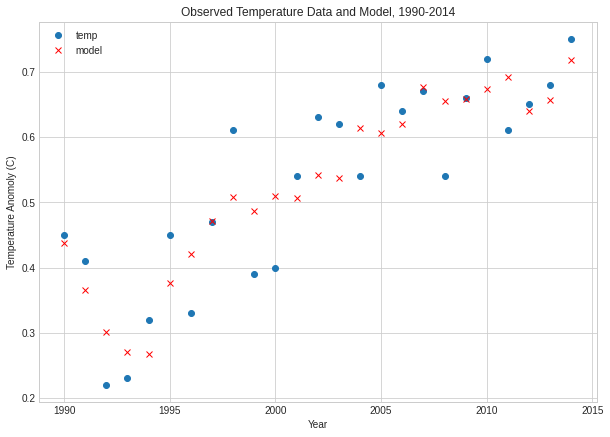

In [21]:
model_df.plot(y=["temp", "model"], style=["o", "rx"], title="Observed Temperature Data and Model, 1990-2014", \
             figsize=(10, 7));
plt.xlabel("Year")
plt.ylabel("Temperature Anomoly (C)");

Judging by this plot, the model does seem to function as a pretty good predicter of temperature over this time span. However, there does appear to be a bit of "overfitting" between 1990 and 1995 where the predicted temperature is decreasing every year. Overfitting means that the model is fitting to the noise in the data, so it may produce results very similar to the observed data but does not represent the actual underyling trends.

The linear regression of temperature vs. year from the exploratory data analysis stage is in my opinion a better model of temperature over time, so let's explore that more. Is a line the best model of that data, or is there some other function that could better represent it? Let's try a second degree polynomial.

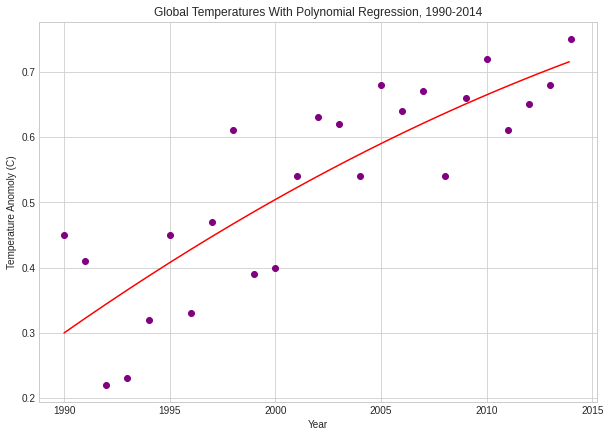

In [22]:
X = df.index.values.reshape(-1, 1)
y = df.temp

# creates polynomial regression
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

# creates dataframe with the model's predictions for values in X_grid
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
poly_reg_df = pd.DataFrame(lin_reg.predict(poly_reg.fit_transform(X_grid)))

# plots temp data
plt.figure(figsize=(10, 7))
plt.scatter(X,y, color='purple') 

# plots polynomial regression model
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)),color="red")

plt.title("Global Temperatures With Polynomial Regression, 1990-2014")
plt.xlabel("Year")
plt.ylabel("Temperature Anomoly (C)");

The second-degree polynomial regression of temperature data with time actually appears almost linear. This indicates to me that the trend in the data is pretty close to linear, and using anything other than a first-order linear regression might just lead to overfitting. 

## Conclusions
After all of the analysis, unfortunately I could not find a clear relationship between greenhouse gas emissions and temperature within this data. Total greenhouse gas emissions in the UN for the most part decreased from 1990-2014, whereas global temperatures increased. That gives the impression that there is an inverse correlation between emissions and temperatures, which doesn't make sense given what I know about global warming. I thought the underlying relationship could actually be between greenhouse gas emissions and the change in global temperatures, however I could not find this trend in the data either. I concluded this dataset may be to small of a sample size, or not representative enough of global emissions.

What I did find, however, is a clear linear direct relationship between temperature and time from 1990-2014. Even when using a second-degree polynomial regression, the relationship seemed close to linear, so I decided the linear model was best.

Thanks for taking your time to read this tutorial, hopefully after following me through the data science pipeline you better understand how to glean insight from data, and can use this process to discover interesting things on your own in the future!